# Topic Modelling
- The next phase of the project involves topic modelling. This is done to categorize news articles into different clusters based on the topics or themes itemized in them. Each text or sentence in a document is usually associated with a topic or theme. Although it is possible to have words that are attributable to multiple topics, words that are closely related to each other tend to be in close proximity within a vector space. Because of this, we can be able to cluster these words based on their distribution in a vector space into different topics.

- This can be useful to our project because we might learn certain relationship or distribution between words that are associated with fake news and this can be useful in our exploration.

- There are different types of techniques for topic modelling however our exploration will focus on Latent Dirichlet Allocation (LDA) and BERT-Topic.

# Latent Dirichlet Allocation (LDA)
- LDA is based on the assumption that a document is a blend of topics and each topics are a mixture of words.

- To implement LDA, we will make use of the primary dataset that was cleaned extensively.

**Attribute Description**:
- Text - cleaned content from social media/ new platforms
- Text_Tag - Different types of content tags (9 unique products)
- Labels - Represents various classes of Labels
  - Half-True - 2
  - False - 1
  - Mostly-True - 3
  - True - 5
  - Barely-True - 0
  - Not-Known - 4

- we will start by removing the Not-Known subcategories.

## Import relevant libraries


In [ ]:
#for reading data
import pandas as pd

#for manipulation and numerical comp
import numpy as np

#to implemnt LDA
import gensim.corpora as corpora
import gensim
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from gensim.utils import simple_preprocess

In [ ]:
#!pip install pyLDAvis==3.4.0

In [ ]:
#for visualization
import pyLDAvis
import pyLDAvis.gensim

#for warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Connect google drive

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


## Read the cleaned data

In [ ]:
def data_reader(path):
  """
  returns a dataframe from csv file in specified path
  """
  data = pd.read_csv(path)
  return data

In [ ]:
path = '/content/MyDrive/MyDrive/fake_news_project/cleaned_news.csv'
data = data_reader(path)

In [ ]:
#see top 5 rows of the data
data.head()

,Labels,Text,Text_Tag
0,1,say annies list political group support third ...,abortion
1,2,decline coal start started natural gas took st...,"energy,history,job-accomplishments"
2,3,hillary clinton agrees john mccain voting give...,foreign-policy
3,1,health care reform legislation likely mandate ...,health-care
4,2,economic turnaround started end term,"economy,jobs"


## Remove 'Not-Known' Category

In [ ]:
#get the index for the unknown_label
unknown_index = data[data['Labels'] == 4].index.tolist()

#drop those rows
data.drop(index=unknown_index, inplace=True)

In [ ]:
#reset the index of the dataframe
data.reset_index(drop=True, inplace=True)

In [ ]:
#check if label 4 is still in the dataset. An empty frame is expected!
data[data['Labels'] == 4]

,Labels,Text,Text_Tag


In [ ]:
#make a copy of the dataframe
df = data.copy()

# Implementing LDA
- Step 1: tokenize the sentences (strings)
- Step 2: create an id2word dictionary and corpus
- step 3: create the LDA model
- step 4: visualize the topics obtained by the model

In [ ]:
df['Text'].head()

0    say annies list political group support third ...
1    decline coal start started natural gas took st...
2    hillary clinton agrees john mccain voting give...
3    health care reform legislation likely mandate ...
4                 economic turnaround started end term
Name: Text, dtype: object

In [ ]:
def processing(row):
  """
  implements gensim.parsing.preprocess_string method on each row of text in the dataframe
  agrs:
      row: each row of text in the dataframe
  """

  new = preprocess_string(row)
  return new

In [ ]:
#apply the function to the text column
df['Text'] = df['Text'].apply(processing)

In [ ]:
#create an id2word dictionary which is a vocabulary that encapsulates the mapping between words and their ids
id2word = corpora.Dictionary(df['Text'])

In [ ]:
def bow_formater(row):
  """
  implements the id2word.doc2bow method on each row of the text
  this converts the tokens to bow numerical representations of each text in the sequence or list.
  args:
    row: each row (list of tokens in the dataframe)
  """
  bow = id2word.doc2bow(row)

  #return the representation
  return bow

In [ ]:
df_c = df.copy()

In [ ]:
df_c['bow'] = df_c['Text'].apply(bow_formater)

In [ ]:
df_c['bow'].head()

0    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (1...
2    [(10, 1), (14, 1), (19, 1), (20, 1), (21, 1), ...
3    [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...
4        [(17, 1), (38, 1), (39, 1), (40, 1), (41, 1)]
Name: bow, dtype: object

- we will randomly select 30 topics to be visulaized, and we only want topics with probability above 0.4. This means that these 30 topics selected will have at least a 40% chance of relevancy to the model.

In [ ]:
# Create the LDA model
lda_model = LdaModel(corpus=df_c['bow'], id2word=id2word, num_topics=30,
                     passes=10,
                     minimum_probability=0.4, random_state=0)

In [ ]:
#enable interactive visualiation on jupyter notebook
pyLDAvis.enable_notebook()

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, df['bow'], id2word, mds = "mmds",R=30, n_jobs=1)

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14    -0.420095 -0.209735       1        1  5.073840
2      0.054478 -0.302182       2        1  4.808593
25    -0.404683 -0.016690       3        1  4.456239
4      0.276127 -0.218626       4        1  4.287076
13     0.392157 -0.194735       5        1  4.178878
6      0.499299  0.015484       6        1  4.110715
20     0.390321  0.178633       7        1  4.090550
8      0.155099 -0.384419       8        1  4.058422
19    -0.274691 -0.256306       9        1  4.028205
27    -0.255831 -0.402839      10        1  3.804840
10    -0.198396  0.020254      11        1  3.758318
17    -0.455764  0.144210      12        1  3.596842
28    -0.063205 -0.107555      13        1  3.519797
15    -0.104935 -0.384277      14        1  3.455800
22     0.043712  0.427232      15        1  3.332383
29    -0.136853  0.244847      16        1  3.066694
21    -0.334383  0.305103      17        1  3.019571
26    -0.300886 -0.122322      18        1  2.854081
24    -0.001342 -0.446843      19        1  2.845388
1      0.287876 -0.376868      20        1  2.727231
9      0.097673 -0.078603      21        1  2.710709
16     0.148028  0.391204      22        1  2.646008
18    -0.306419  0.143050      23        1  2.589674
12     0.042316  0.202467      24        1  2.582291
7     -0.211317  0.404670      25        1  2.574831
3     -0.073766  0.394706      26        1  2.523392
0      0.221544  0.041171      27        1  2.458554
5      0.377370  0.003875      28        1  2.430098
11     0.260560  0.223004      29        1  2.402149
23     0.296008  0.362090      30        1  2.008832, topic_info=           Term         Freq        Total Category  logprob  loglift
174       state  1706.000000  1706.000000  Default  30.0000  30.0000
175         tax  1203.000000  1203.000000  Default  29.0000  29.0000
237       obama   930.000000   930.000000  Default  28.0000  28.0000
323         job   785.000000   785.000000  Default  27.0000  27.0000
31       health   734.000000   734.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
712        send    35.117855    44.470342  Topic30  -4.1314   3.6715
1647  interview    20.132373    27.251016  Topic30  -4.6878   3.6049
381        help    43.565459   160.125692  Topic30  -3.9158   2.6059
240       todai    23.320155   194.672189  Topic30  -4.5408   1.7856
96       nation    20.006880   508.427769  Topic30  -4.6940   0.6724

[1371 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
960      22  0.926957   abbott
230      28  0.986957      abl
948       1  0.948624  abolish
0        14  0.991912    abort
807      24  0.971599     abus
...     ...       ...      ...
326      19  0.991709     york
134      19  0.867974    young
134      21  0.116843    young
217      24  0.936791    youth
414      29  0.981051     zero

[1939 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 3, 26, 5, 14, 7, 21, 9, 20, 28, 11, 18, 29, 16, 23, 30, 22, 27, 25, 2, 10, 17, 19, 13, 8, 4, 1, 6, 12, 24])

- There is a wide spread of distribution amongst these selected number of topics.
- Some of the topics have very close proximity between each other. some of these are (4 and 5, 2 and 8, 15 and 22, (1, 9, and 18) etc.

## Coherence Score
- Coherence score quantifies the degree to which the words within a topic are semantically similar or related. A higher coherence score indicates that the topics are more coherent and interpretable.
- We will evaluate the coherence score for a range of 10-40 topics and see which number of topics will give us the best or optimal coherence score.

In [ ]:
#import coherence model
from gensim.models import CoherenceModel


coherence_model = CoherenceModel(model=lda_model, texts=df['Text'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f'Topic Coherence Score: {coherence_score}')


In [ ]:
#for plotting
import matplotlib.pyplot as plt

def coherence_plotter(lower, upper):
  """
  plots the coherence score against the number of topics
  lower: int. set the lower range
  upper: int, set the upper range

  """
  #save the coherence scores
  coherence_scores = []

  #iterate over the number of desired topics
  for num_topics in range(lower, upper):
      #get the lda model
      lda_model = LdaModel(corpus=df['bow'], id2word=id2word, num_topics=num_topics, passes=10, minimum_probability=0.4, random_state=0)
      #get the coherence model
      coherence_model = CoherenceModel(model=lda_model, texts=df['Text'], dictionary=id2word, coherence='c_v')
      #compute the coherence score
      coherence_score = coherence_model.get_coherence()
      #append the score to the list
      coherence_scores.append(coherence_score)
  #plot the scores against number of topics
  plt.plot(range(lower, upper), coherence_scores, marker='o')
  plt.xlabel('Number of Topics')#x-label
  plt.ylabel('Coherence Score')#y-label
  plt.title('Optimal Number of Topics')#set the title
  plt.show()#display the plot

  return coherence_scores

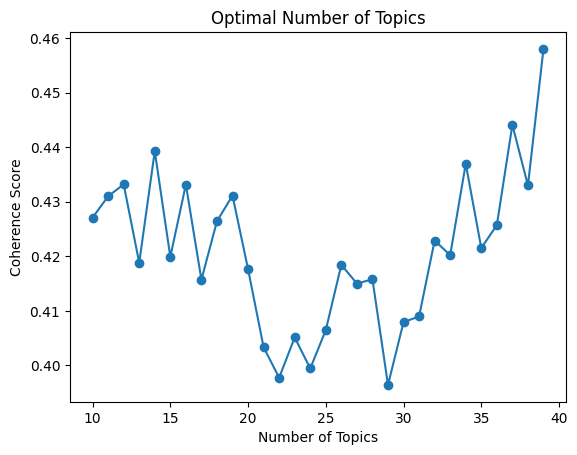

In [ ]:
coherence_scores = coherence_plotter(10, 40)

- From this chart, we can see that using 30 number of topics did not give the highest coherence score.
- The chart shows that 39 Topics would give the highest coherence scores.
- 14 topics however, proved to give a coherence score of 0.44.

In [ ]:
# Create the LDA model
lda_model = LdaModel(corpus=df['bow'], id2word=id2word, num_topics=14,
                     passes=10,
                     minimum_probability=0.4, random_state=0)

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, df['bow'], id2word, mds = "mmds",R=30, n_jobs=1)
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.017721 -0.130654       1        1  9.810354
3     -0.118023 -0.393785       2        1  9.483441
0      0.114173  0.338627       3        1  9.222714
1     -0.099750  0.073588       4        1  8.784512
13    -0.359770  0.111367       5        1  8.449013
8     -0.261822 -0.213558       6        1  8.130527
5      0.085872 -0.358769       7        1  7.474845
2      0.275340 -0.268342       8        1  6.168927
6      0.380271 -0.099036       9        1  6.092035
11     0.331640  0.259044      10        1  5.550598
12    -0.381711 -0.076556      11        1  5.490775
4      0.305449  0.082258      12        1  5.228031
9     -0.243939  0.339053      13        1  5.217230
10    -0.045448  0.336764      14        1  4.897000, topic_info=        Term         Freq        Total Category  logprob  loglift
175      tax  1201.000000  1201.000000  Default  30.0000  30.0000
132  percent  1465.000000  1465.000000  Default  29.0000  29.0000
237    obama   942.000000   942.000000  Default  28.0000  28.0000
323      job   790.000000   790.000000  Default  27.0000  27.0000
31    health   754.000000   754.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
889     take    36.908157    52.119351  Topic14  -4.9727   2.6714
189     want    55.627075   300.264241  Topic14  -4.5625   1.3306
109   govern    43.144076   451.188361  Topic14  -4.8166   0.6692
151    spend    37.403208   444.819428  Topic14  -4.9594   0.5406
117  billion    34.951890   536.407367  Topic14  -5.0272   0.2856

[759 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
230       8  0.152918    abl
230       9  0.830124    abl
0         4  0.641008  abort
0         6  0.066311  abort
0         8  0.066311  abort
...     ...       ...    ...
51       10  0.009645   year
51       11  0.001378   year
51       13  0.057871   year
51       14  0.014468   year
326       7  0.986515   york

[1279 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 1, 2, 14, 9, 6, 3, 7, 12, 13, 5, 10, 11])

- the above map shows the distribution of the topics and it shows much more separated clusters(topics) juxtaposed to what we obtained when 30 topics was used.

# Non-Negative Matrix Factorization
- NMF decomposes a parent matrix into 2 matrices. The parent matrix is the Document-Term Matrix (DTM) which is decomposed into 2 matrices namely: Document-topic Matrix and Topic-Term Matrix.

- The DTM is a vectorized representation of the text in the data, where each row is a document and each columns represent the unique words. The values in each cell is the frequency of occurence of the term in that document.
- The Document-Topic Matrix is also a numerical representation of the degree of relationship between each topic(columns) and the documents(rows); the higher the value in the cell, the higher the degree of association between that topic and that document.
- The topic-term matrix is a numerical representation of the relationship between a topic and the terms in the document.

In [ ]:
df.head()

,Labels,Text,Text_Tag
0,1,say annies list political group support third ...,abortion
1,2,decline coal start started natural gas took st...,"energy,history,job-accomplishments"
2,3,hillary clinton agrees john mccain voting give...,foreign-policy
3,1,health care reform legislation likely mandate ...,health-care
4,2,economic turnaround started end term,"economy,jobs"


In [ ]:
#import Tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

#instantiate the vectorizer
vec = TfidfVectorizer(max_features=300)
#get the vector representation (document-term matrix)
dtm = vec.fit_transform(df['Text']).toarray()


In [ ]:
pd.DataFrame(dtm)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.556236,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.405991,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11726,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11727,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11728,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11729,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def sk_nmf(topics, df, dtm):
  """
  returns a copy of the dataframe with an added Topic column, the nmf model, document_topic_matrix, and topic_term_matrix.

  it decomposes a document term matrix (dtm) into document_topic_matrix, topic_term_matrix
  args:
    df: dataframe
    dtm: document term matrix
    topics :int. the number of desired topics
  """

  #instantiate the nmf model
  nmf_model = NMF(n_components=topics, random_state=42)

  #get the document-topic matrix
  document_topic_matrix = nmf_model.fit_transform(dtm)

  df_c = df.copy() #make a copy of the dataframe
  # Assign topics to documents
  df_c['Topic'] = document_topic_matrix.argmax(axis=1)

  # Get the topics-terms matrix
  topic_term_matrix = nmf_model.components_

  return df_c, nmf_model, document_topic_matrix, topic_term_matrix




In [ ]:
df_c, nmf_model, document_topic_matrix, topic_term_matrix = sk_nmf(10, df, dtm)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


- Now we will display the top words associated with each topics

In [ ]:
def topic_word_display(vec, ttm):
  """
  Displays the top words for each topic
  vec: vectorizer
  ttm: topic term matrix
  """
  #get the name of the top words or terms in the DTM
  feature_names = vec.get_feature_names_out()

  #loop over the topic-term matrix
  for i, topic in enumerate(ttm):
      #sort the topics and get the index of the topics with higher value in descending order i.e from the biggest to smallest
      top_words_idx = topic.argsort()[:-10-1:-1]
      #get the word using its obtained index
      top_words = [feature_names[idx] for idx in top_words_idx]
      #display it
      print(f'Topic {i + 1}: {", ".join(top_words)}')



In [ ]:
topic_word_display(vec, ttm=topic_term_matrix)

Topic 1: tax, cut, income, pay, increase, billion, raise, property, plan, rate
Topic 2: say, texas, trump, donald, mitt, romney, hillary, rick, scott, campaign
Topic 3: state, united, texas, country, school, nation, georgia, world, rate, florida
Topic 4: percent, rate, unemployment, american, since, income, le, top, increased, federal
Topic 5: obama, president, barack, administration, obamas, bush, said, office, debt, since
Topic 6: health, care, law, insurance, plan, cost, reform, government, act, federal
Topic 7: year, last, two, four, every, billion, ago, average, past, three
Topic 8: job, created, new, since, lost, wisconsin, sector, private, growth, month
Topic 9: people, million, american, country, dollar, work, obamacare, day, every, city
Topic 10: would, bill, republican, one, voted, time, said, budget, clinton, senate


## Implementing Gensim's NMF to know the optimal number of clusters we can use.

In [ ]:
from gensim.models.nmf import Nmf

In [ ]:
#for plotting
import matplotlib.pyplot as plt

def coherence_plotter(lower, upper):
  """
  plots the coherence score against the number of topics
  lower: int. set the lower range
  upper: int, set the upper range

  """
  #save the coherence scores
  coherence_scores = []

  #iterate over the number of desired topics
  for num_topics in range(lower, upper):
      #get the lda model
      nmf_model = Nmf(corpus=df_c['bow'], id2word=id2word, num_topics=num_topics, passes=10, minimum_probability=0.4, random_state=0)
      #get the coherence model
      coherence_model = CoherenceModel(model=nmf_model, texts=df_c['Text'], dictionary=id2word, coherence='c_v')
      #compute the coherence score
      coherence_score = coherence_model.get_coherence()
      #append the score to the list
      coherence_scores.append(coherence_score)
  #plot the scores against number of topics
  plt.plot(range(lower, upper), coherence_scores, marker='o')
  plt.xlabel('Number of Topics')#x-label
  plt.ylabel('Coherence Score')#y-label
  plt.title('Optimal Number of Topics')#set the title
  plt.show()#display the plot

  return coherence_scores

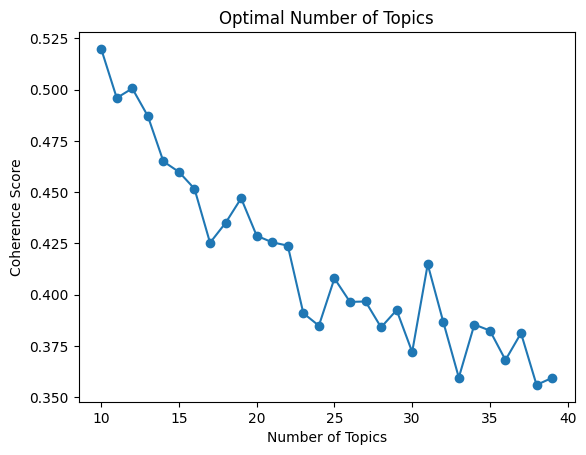

In [ ]:
coherence_scores = coherence_plotter(10,40)

- The Chart shows that using NMF algorithm resulted in a much higher coherence score relative to LDA.
- It also shows that having 10 topics (Which we demonstrated previously) gave the highest coherence score.

#BERTopic
- BerTopic is a topic modeling technique that uses transformers (BERT embeddings).
- The idea is that we obtain BERT word embedding representation of the Texts by using BERT encoders after which we can apply traditional topic modeling techniques, such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF), to identify topics within the dataset.
- BERT embeddings provide a rich representation of the semantics in the text, which may lead to more accurate and context-aware topic modeling results.

In [ ]:
# !pip install bertopic
# !pip install bertopic[visualization]

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [ ]:
# Apply BERTopic for topic modeling
topic_model = BERTopic()
topics, probabilities = topic_model.fit_transform(data['Text'].tolist())

In [ ]:
#get the number of topics
topic_model.get_topic_freq().shape

(168, 2)

- BerTopic obtained 168 clusters(topics) and 1 outlier.

In [ ]:
#select top 20 topics
topic_model.get_topic_freq().head(20)

,Topic,Count
4,-1,4547
10,0,413
55,1,339
0,2,301
9,3,247
37,4,139
2,5,128
52,6,116
67,7,113
23,8,112


In [ ]:
topic_model.get_topics()[0]

[('health', 0.05202302213563223),
 ('care', 0.04702918446121484),
 ('insurance', 0.03454132840665912),
 ('obamacare', 0.03230707704424341),
 ('reform', 0.020254022363123687),
 ('plan', 0.01711055240883619),
 ('premium', 0.01610529642051705),
 ('affordable', 0.014978676688346737),
 ('cost', 0.01398543189592614),
 ('individual', 0.013865147388715084)]

- This shows that the topic cluster 0 concerns healthcare and medicare laws.

In [ ]:
#visualize the topics
topic_model.visualize_topics()

- This Map helps in visualizing the relationship between the topics (clusters) and it is seen that some clusters are a inside a bigger cluster.
- Hence, We will proceed further by reducing the number fo topics

In [ ]:
topic_model.visualize_barchart(top_n_topics=10, n_words=7)

- The chart above shows the top 7 terms or words that are associated with 10 topics.
- Clearly Topic 5 tlks about Education while topic 7 talks about drugs.

## Reducing the topics to 10.

In [ ]:
topic_model.reduce_topics()

In [ ]:
# Apply BERTopic for topic modeling
topic_model2 = BERTopic(nr_topics=10)
topics2, probabilities2 = topic_model2.fit_transform(df['Text'].tolist())

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#visualize the topics
topic_model2.visualize_topics()

In [ ]:
topic_model2.visualize_barchart(top_n_topics=10, n_words=7)

## Computing the Coherence Score

In [ ]:
data.head()

,Labels,Text,Text_Tag
0,1,say annies list political group support third ...,abortion
1,2,decline coal start started natural gas took st...,"energy,history,job-accomplishments"
2,3,hillary clinton agrees john mccain voting give...,foreign-policy
3,1,health care reform legislation likely mandate ...,health-care
4,2,economic turnaround started end term,"economy,jobs"


In [ ]:
data['Topic'] = topics

In [ ]:
data['Topic'].head()

0      2
1    123
2      5
3      2
4     78
Name: Topic, dtype: int64

In [ ]:
#group the words of each topic together
documents_per_topic = data.groupby(['Topic'], as_index=False).agg({'Text': ' '.join})

In [ ]:
documents_per_topic.shape

(168, 2)

- we expect 168 rows which represent each topic

In [ ]:
#preprocess the text in each document
cleaned_docs = topic_model._preprocess_text(documents_per_topic['Text'].values)

In [ ]:
# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
#To handle preprocessing, tokenization, and n-grams generation.
analyzer = vectorizer.build_analyzer()

In [ ]:
# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

In [ ]:
# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.6804622680204016

- When Bertopic gave 168 Topics, the coherence score was 0.68. This is higher than what we obtained from NMF and LDA methods. However, we will obtain the coherence score of the bertopic models using a range of topics (10 to 30).

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def topic_coherence_score(df, lower=10, upper=50):
  """
  computes the coherence score for different number of topics obtained from BerTopic
  df: dataframe
  lower: lower range default=10
  upper: upper range default =50
  """
  #save the coherence score inside the list
  score = []

  for i in range(lower, upper):
    #for each iteration make a copy of the dataset
    data = df.copy()

    # Apply BERTopic for topic modeling
    topic_model = BERTopic(nr_topics=i)

    #get the topic and probabilities
    topics, probabilities = topic_model.fit_transform(data['Text'].tolist())

    #create a new column for the topics
    data['Topic'] = topics

    #group the words of each topic together
    documents_per_topic = data.groupby(['Topic'], as_index=False).agg({'Text': ' '.join})

    #preprocess the text in each document
    cleaned_docs = topic_model._preprocess_text(documents_per_topic['Text'].values)

    # Extract vectorizer and analyzer from BERTopic
    vectorizer = topic_model.vectorizer_model
    #To handle preprocessing, tokenization, and n-grams generation.
    analyzer = vectorizer.build_analyzer()

    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names_out() #get the top words
    tokens = [analyzer(doc) for doc in cleaned_docs] #pass each words to the analyzer for preprocessing to obtain tokens
    dictionary = corpora.Dictionary(tokens) #create vocabulary from the tokens
    corpus = [dictionary.doc2bow(token) for token in tokens] #get vector representation of the tokens
    #obtain the words in each topic in a list of lists
    topic_words = [[words for words, _ in topic_model.get_topic(topic)]
                  for topic in range(len(set(topics))-1)]

      # Evaluate coherence using coherence model
    coherence_model = CoherenceModel(topics=topic_words,
                                    texts=tokens,
                                    corpus=corpus,
                                    dictionary=dictionary,
                                    coherence='c_v')
    #get the coherence score
    coherence = coherence_model.get_coherence()
    #append it to the list
    score.append(coherence)

  #plot the scores against number of topics
  plt.plot(range(lower, upper), score, marker='o')
  plt.xlabel('Number of Topics')#x-label
  plt.ylabel('Coherence Score')#y-label
  plt.title('Optimal Number of Topics')#set the title
  plt.show()#display the plot

  return score



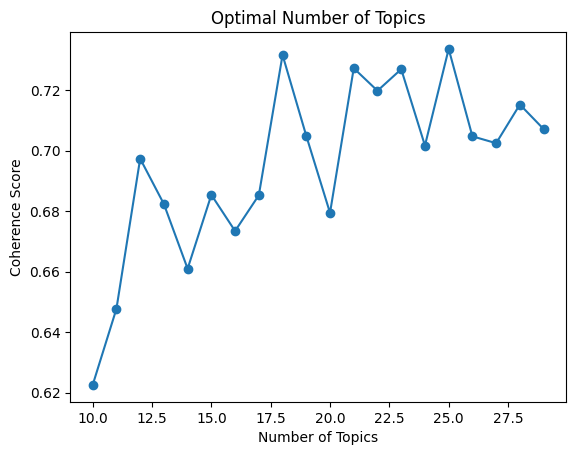

In [ ]:
score = topic_coherence_score(df=data, lower=10, upper=30)

- From the chart, it is observed that coherence score above 0.72 can be obtained with 18, 21, 23, and 25.

- Moreso, it is observed that relative to LDA and NMF, BerTopic gave the highest Coherence Score.

- We will build the BerTopic model with 25 topics and evaluate the words.

In [ ]:
# Apply BERTopic for topic modeling
topic_model3 = BERTopic(nr_topics=25)
topics3, probabilities3 = topic_model3.fit_transform(data['Text'].tolist())

In [ ]:
#visualize the topics
topic_model3.visualize_topics()

In [ ]:
#dipslay top 7 words in 15 topics
topic_model3.visualize_barchart(top_n_topics=15, n_words=7)

- Topic 5 talks more about parenthood, while topic 8 talks about natural resources.

### BerTopic gave the highest Coherence score.